<a href="https://colab.research.google.com/github/brandon-setegn/fta-751-bofa-research/blob/master/FTA_751_BofA_HMDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Bank of America HMDA Data

In [ ]:
import os, csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
#%matplotlib notebook
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Set the number format to no decimals
pd.set_option('display.float_format', lambda x: f'{x:,.0f}')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Development/machine_learning/fta751')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hmda2022 = pd.read_csv('B4TYDEB6GKMZO031MB27_header.csv',index_col=False,sep='|')
hmda2022.columns = hmda2022.columns.str.lower()

In [ ]:
hmda2022.describe()

,activity_year,loan_type,loan_purpose,preapproval,construction_method,occupancy_type,loan_amount,action_taken,county_code,census_tract,...,submission_of_application,initially_payable_to_institution,aus_1,aus_2,aus_3,aus_4,aus_5,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose
count,"348,961","348,961","348,961","348,961","348,961","348,961","348,961","348,961","339,452","339,452",...,"348,961","348,961","348,961","37,538",0,0,0,"348,961","348,961","348,961"
mean,"2,022",1,7,2,1,1,"298,233",3,"24,436","24,436,113,405",...,1,1,6,7,NaN,NaN,NaN,2,1,2
std,0,0,11,0,0,0,"979,905",2,"16,538","16,537,640,320",...,0,0,2,0,NaN,NaN,NaN,0,0,0
min,"2,022",1,1,1,1,1,"5,000",1,"1,001","1,001,020,501",...,1,1,2,2,NaN,NaN,NaN,1,1,1
25%,"2,022",1,2,2,1,1,"65,000",1,"8,037","8,037,000,702",...,1,1,6,7,NaN,NaN,NaN,2,1,2
50%,"2,022",1,2,2,1,1,"135,000",3,"24,005","24,005,402,307",...,1,1,6,7,NaN,NaN,NaN,2,1,2
75%,"2,022",1,4,2,1,1,"305,000",3,"37,161","37,161,960,526",...,1,1,6,7,NaN,NaN,NaN,2,2,2
max,"2,022",4,32,2,2,3,"265,005,000",8,"56,041","56,041,975,402",...,3,3,7,7,NaN,NaN,NaN,2,2,2


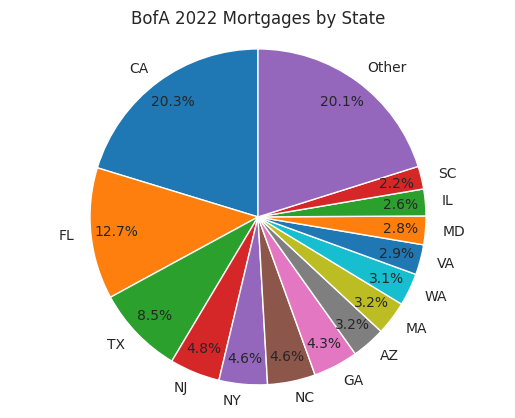

In [ ]:
# prompt: How do I create a pie chart using matplotlib sorted by size
hmda2022_cutoff = hmda2022.groupby('state_code').size().reset_index(name='count')
hmda2022_cutoff.loc[hmda2022_cutoff['count'] < 7000, 'state_code'] = 'Other'

# Group the data by state_code and count the number of occurrences
grouped_df = hmda2022_cutoff.groupby('state_code').agg(
    count_sum=pd.NamedAgg(column='count', aggfunc='sum')
    ).reset_index()

# Sort the data by count
grouped_df = grouped_df.sort_values(by='count_sum', ascending=False)
grouped_df.rename(columns={'count_sum': 'count'}, inplace=True)

grouped_df = pd.concat(
    [grouped_df[grouped_df['state_code'] != "Other"],
     grouped_df[grouped_df['state_code'] == "Other"]
     ]
    )

# Extract the state codes and counts
labels = grouped_df['state_code'].to_list()
counts = grouped_df['count'].to_list()

# Create a pie chart using matplotlib
fig, ax = plt.subplots()

sns.set_style("darkgrid")
#sns.reset_orig()
ax.pie(counts, labels=labels, autopct="%1.1f%%", startangle=90, pctdistance=0.85)


# Add a title
ax.set_title("BofA 2022 Mortgages by State")

# Equal aspect ratio ensures a circular pie chart
ax.axis('equal')

# Display the pie chart
plt.show()


In [ ]:
hmda2022_cutoff = hmda2022.groupby('state_code').size().reset_index(name='count')
hmda2022_cutoff.loc[hmda2022_cutoff['count'] < 6000, 'state_code'] = 'Other'

# Group the data by state_code and count the number of occurrences
grouped_df = hmda2022_cutoff.groupby('state_code').agg(
    count_sum=pd.NamedAgg(column='count', aggfunc='sum')
    )
sorted_df = grouped_df.sort_values(by='count_sum', ascending=False).reset_index()
pd.concat([sorted_df[sorted_df['state_code'] != "Other"], sorted_df[sorted_df['state_code'] == "Other"]])


,state_code,count_sum
0,CA,68838
2,FL,42951
3,TX,28835
4,NJ,16413
5,NY,15773
6,NC,15652
7,GA,14643
8,AZ,11005
9,MA,10996
10,WA,10631
